In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pof_piv as piv
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import trange

In [3]:
# Set parameters
frame_rate = 40000
position = 4
series = 3
window_counts = (25, 8)
margins = (0, 0, 128, 0)

In [4]:
# Read all images in the folder
series_name = 'pos' + str(position) + '-' + str(series)
directory = 'data/' + series_name

images = piv.read_image_directory(directory, image_type='tif', timing=True)
background = cv.imread('data/backgrounds/' + series_name + '.tif', 
                       cv.IMREAD_GRAYSCALE)

Reading images: 100%|██████████| 21041/21041 [00:25<00:00, 832.40it/s]


In [5]:
# Subtract the background from all images
images = piv.subtract_background(images, background)

In [6]:
# If it does not exist, create a subfolder with the series name in the 'processed' directory
processed_directory = 'processed/' + series_name
if not os.path.exists(processed_directory):
    os.makedirs(processed_directory)

In [7]:
# Pre-allocate displacements array
displacements = np.zeros((len(images) - 1, window_counts[0], 2))
centers = np.zeros((len(images) - 1, window_counts[0], 2))

# Loop over all images except the very final one
for i in trange(len(images) - 1):

    # Calculate the PIV between the current and the next image
    displacements[i], centers[i] = piv.horizontal_flow_piv(images[i:i + 2], window_counts, margins=margins)

 58%|█████▊    | 12293/21040 [05:45<04:22, 33.35it/s]/Users/tommieverouden/PycharmProjects/ETPoF/pof_piv/pof_piv/helper_functions.py:169: RuntimeWarning: invalid value encountered in scalar divide
  correction = [(0.5 * (np.log(neighbor[0]) - np.log(neighbor[2]))
100%|██████████| 21040/21040 [09:40<00:00, 36.24it/s]


In [8]:
# Save the displacements to a file
np.save(processed_directory + '/displacements1.npy', displacements)

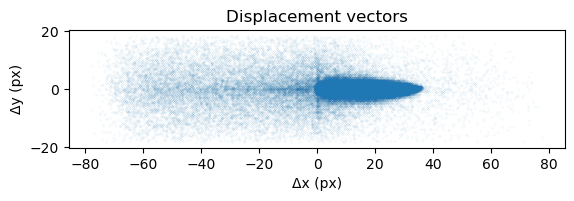

In [9]:
# Plot all displacement vectors as scatter plot
fig, ax = plt.subplots()
ax.scatter(displacements[:, :, 1], displacements[:, :, 0], marker='.', s=0.005)
ax.set_aspect('equal')
ax.set_xlabel('Δx (px)')
ax.set_ylabel('Δy (px)')
ax.set_title('Displacement vectors')
plt.show()

In [10]:
# Load the relevant calibration file
calibration = np.load(f'data/calibration/pos{position}.npy')

In [16]:
np.empty(len(images) - 1)

array([nan, nan, nan, ...,  0.,  0.,  0.])

/var/folders/nt/rmh7rzx15n3_4wkj1k7rpbxw0000gn/T/ipykernel_99824/807509409.py:7: RuntimeWarning: Mean of empty slice
  mean_displ[i] = np.nanmean(np.linalg.norm((displacements[i, (displacements[i, :, 0] >= 0), :]), axis=1))


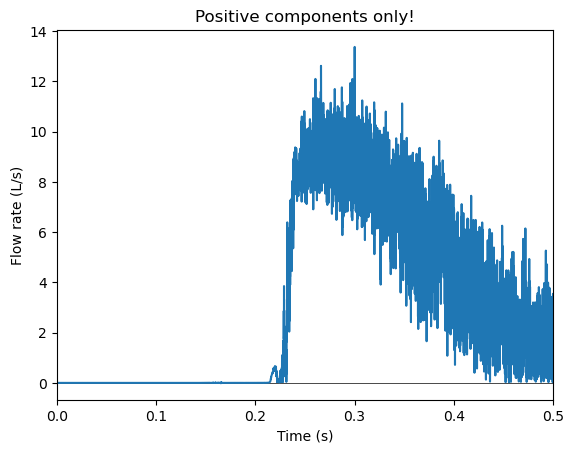

In [56]:
# Plot the mean displacement magnitude over time
fig, ax = plt.subplots()
ax.hlines(0, -1, 1, color='k', lw=0.5)

mean_displ = np.empty(len(images) - 1)
for i in np.arange(len(images) - 1):
    mean_displ[i] = np.nanmean(np.linalg.norm((displacements[i, (displacements[i, :, 0] >= 0), :]), axis=1))

# mean_displ = np.nanmean(np.linalg.norm(displacements_pos, axis=2), axis=1)
# print(mean_displ.shape)
ax.plot(np.arange(len(images) - 1) / frame_rate, mean_displ/calibration[0]*frame_rate/1000 * 0.01 * 0.02 * 1000)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Flow rate (L/s)')
ax.set_title('Positive components only!')
ax.set_xlim(0, 0.5)
plt.show()

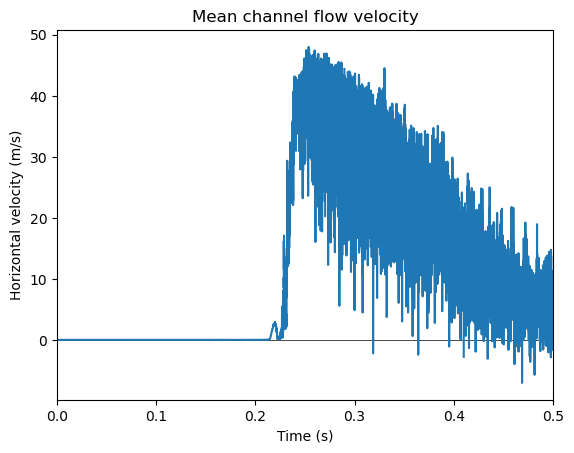

In [12]:
# Plot the mean displacement magnitude over time
fig, ax = plt.subplots()
ax.hlines(0, -1, 1, color='k', lw=0.5)
ax.plot(np.arange(len(images) - 1) / frame_rate, np.mean(displacements[:, :, 1], axis=1)/calibration[0]*frame_rate/1000)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Mean horizontal velocity (m/s)')
# ax.set_title('Mean channel flow velocity')
ax.set_xlim(0, 0.5)
plt.show()

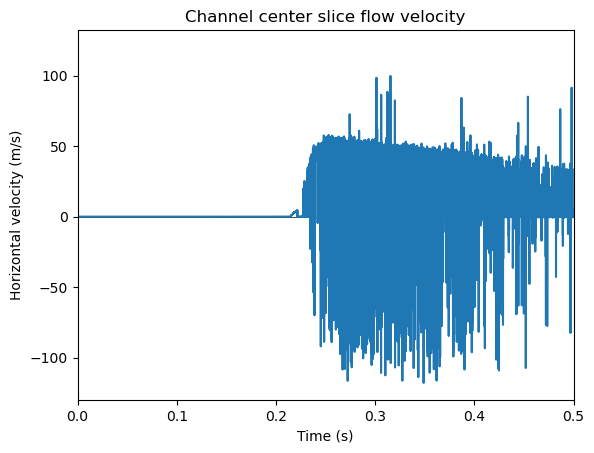

In [13]:
# Plot the mean displacement magnitude over time
fig, ax = plt.subplots()
ax.hlines(0, -1, 1, color='k', lw=0.5)
ax.plot(np.arange(len(images) - 1) / frame_rate, displacements[:, 12, 1]/calibration[0]*frame_rate/1000)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Horizontal velocity (m/s)')
ax.set_title('Channel center slice flow velocity')
ax.set_xlim(0, 0.5)
plt.show()